In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection, tree
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('diabetes - Copy.csv')

In [3]:
df

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,2,5,6,7,11
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,1,11,2,4,6
253677,0,0,0,28,0,0,0,1,1,0,...,0,1,0,0,0,1,2,5,2,5
253678,0,1,0,23,0,0,0,0,1,1,...,0,3,0,0,0,2,7,5,1,6


In [4]:
bmi_mean = df["BMI"].mean()
bmi_std = df["BMI"].std()
df["BMI"] = (df["BMI"] - bmi_mean)/bmi_std

gh_mean = df["GeneralHealth"].mean()
gh_std = df["GeneralHealth"].std()
df["GeneralHealth"] = (df["GeneralHealth"] - gh_mean)/gh_std

mh_mean = df["MentalHealth"].mean()
mh_std = df["MentalHealth"].std()
df["MentalHealth"] = (df["MentalHealth"] - mh_mean)/mh_std

ph_mean = df["PhysicalHealth"].mean()
ph_std = df["PhysicalHealth"].std()
df["PhysicalHealth"] = (df["PhysicalHealth"] - ph_mean)/ph_std

ab_mean = df["AgeBracket"].mean()
ab_std = df["AgeBracket"].std()
df["AgeBracket"] = (df["AgeBracket"] - ab_mean)/ab_std

ib_mean = df["IncomeBracket"].mean()
ib_std = df["IncomeBracket"].std()
df["IncomeBracket"] = (df["IncomeBracket"] - ib_mean)/ib_std

In [5]:
df["BiologicalSex"] = np.where(df["BiologicalSex"] == 1, 0, 1)

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[["EducationBracket"]]).toarray())
encoder_df.columns = ["Kindergarten", "Elementary", "HighSchool", "GED", "College", "Graduate"]
df.drop("EducationBracket", axis=1, inplace=True)
df = df.join(encoder_df)

encoder_df = pd.DataFrame(encoder.fit_transform(df[["Zodiac"]]).toarray())
encoder_df.columns = ["Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo", "Libra", "Scorpio", "Sagittarius", "Capricorn", "Aquarius", "Pisces"]
df.drop("Zodiac", axis=1, inplace=True)
df = df.join(encoder_df)

In [7]:
df

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,Gemini,Cancer,Leo,Virgo,Libra,Scorpio,Sagittarius,Capricorn,Aquarius,Pisces
0,0,1,1,1.757932,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,-0.511805,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,1,1,-0.057858,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,-0.209173,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,1,-0.663121,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,2.514511,0,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253676,1,1,1,-1.571016,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
253677,0,0,0,-0.057858,0,0,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253678,0,1,0,-0.814437,0,0,0,0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Question 1

In [8]:
X_df_1 = df.drop("Diabetes", axis=1)
y_df_1 = df["Diabetes"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_1, y_df_1, test_size = 0.3, random_state = 0)

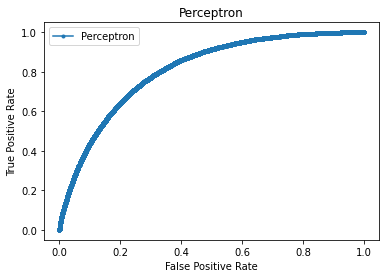

The accuracy for Perceptron is 86.093%
AUC = 0.80945


In [9]:
perceptron = Perceptron(penalty='l1', tol=1e-3, random_state=0)
perceptron = CalibratedClassifierCV(perceptron)
perceptron.fit(X_train, y_train)
probs = perceptron.predict_proba(X_test)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='Perceptron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Perceptron')
plt.legend()
plt.show()
accuracy = perceptron.score(X_test, y_test)
print('The accuracy for Perceptron is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

# Question 2

In [10]:
X_df_2 = df.drop("Diabetes", axis=1)
y_df_2 = df["Diabetes"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_2, y_df_2, test_size = 0.3, random_state = 0)

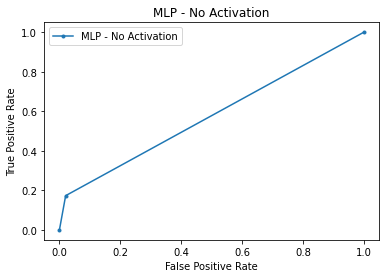

The accuracy for MLP is 86.559%
AUC = 0.57638


In [11]:
mlp_no_act = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=0)  
mlp_no_act.fit(X_train, y_train)  
predictions = mlp_no_act.predict(X_test) 
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - No Activation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - No Activation')
plt.legend()
plt.show()
accuracy = mlp_no_act.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

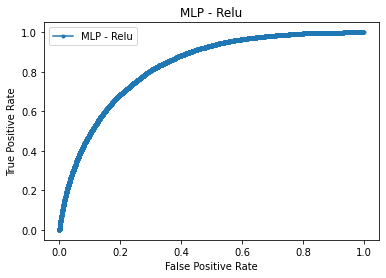

The accuracy for MLP is 86.559%
AUC = 0.83061


In [12]:
mlp_relu = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, activation='relu', random_state=0)  
mlp_relu.fit(X_train, y_train)
predictions = mlp_relu.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Relu')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Relu')
plt.legend()
plt.show()
accuracy = mlp_relu.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

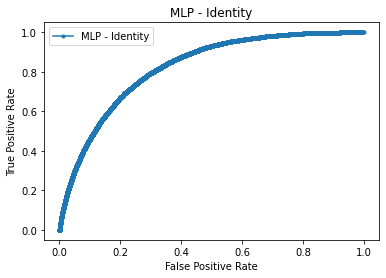

The accuracy for MLP is 86.321%
AUC = 0.82290


In [13]:
mlp_identity = MLPClassifier(hidden_layer_sizes=(10), activation='identity', max_iter=10000, random_state=0)  
mlp_identity.fit(X_train, y_train)
predictions = mlp_identity.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Identity')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Identity')
plt.legend()
plt.show()
accuracy = mlp_identity.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

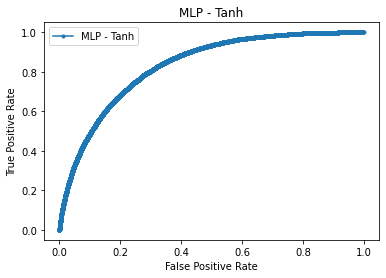

The accuracy for MLP is 86.597%
AUC = 0.83140


In [14]:
mlp_tanh = MLPClassifier(hidden_layer_sizes=(10), activation='tanh', max_iter=10000, random_state=0)  
mlp_tanh.fit(X_train, y_train)  
predictions = mlp_tanh.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Tanh')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Tanh')
plt.legend()
plt.show()
accuracy = mlp_tanh.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

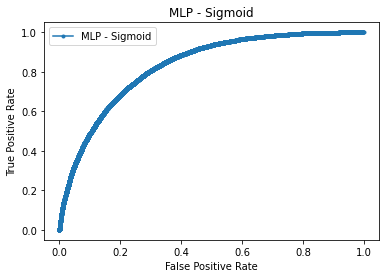

The accuracy for MLP is 86.617%
AUC = 0.83111


In [15]:
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(10), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid.fit(X_train, y_train)  
predictions = mlp_sigmoid.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Sigmoid')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Sigmoid')
plt.legend()
plt.show()
accuracy = mlp_sigmoid.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

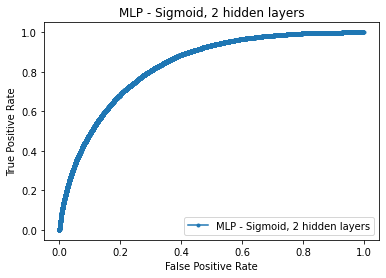

The accuracy for MLP is 86.593%
AUC = 0.83159


In [16]:
mlp_sigmoid_2 = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid_2.fit(X_train, y_train)  
predictions = mlp_sigmoid_2.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Sigmoid, 2 hidden layers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Sigmoid, 2 hidden layers')
plt.legend()
plt.show()
accuracy = mlp_sigmoid_2.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

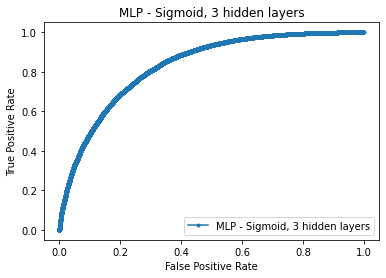

The accuracy for MLP is 86.592%
AUC = 0.83178


In [17]:
mlp_sigmoid_3 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid_3.fit(X_train, y_train)  
predictions = mlp_sigmoid_3.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Sigmoid, 3 hidden layers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Sigmoid, 3 hidden layers')
plt.legend()
plt.show()
accuracy = mlp_sigmoid_3.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

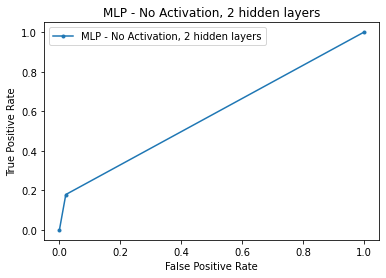

The accuracy for MLP is 86.596%
AUC = 0.57900


In [18]:
mlp_no_act_2 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=10000, random_state=0)  
mlp_no_act_2.fit(X_train, y_train)  
predictions = mlp_no_act_2.predict(X_test) 
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - No Activation, 2 hidden layers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - No Activation, 2 hidden layers')
plt.legend()
plt.show()
accuracy = mlp_no_act_2.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

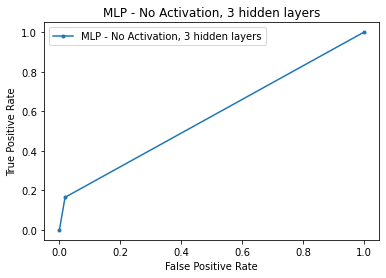

The accuracy for MLP is 86.614%
AUC = 0.57321


In [19]:
mlp_no_act_3 = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=10000, random_state=0)  
mlp_no_act_3.fit(X_train, y_train)  
predictions = mlp_no_act_3.predict(X_test) 
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - No Activation, 3 hidden layers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - No Activation, 3 hidden layers')
plt.legend()
plt.show()
accuracy = mlp_no_act_3.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

# Question 3

In [20]:
X_df_3 = df.drop("Diabetes", axis=1)
y_df_3 = df["Diabetes"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_3, y_df_3, test_size = 0.3, random_state = 0)

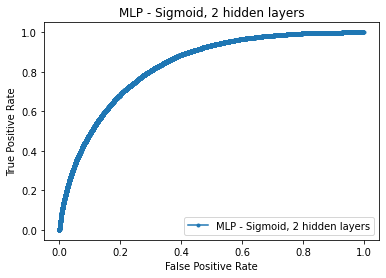

The accuracy for MLP is 86.593%
AUC = 0.83159


In [21]:
mlp_sigmoid_2 = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid_2.fit(X_train, y_train)  
predictions = mlp_sigmoid_2.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Sigmoid, 2 hidden layers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Sigmoid, 2 hidden layers')
plt.legend()
plt.show()
accuracy = mlp_sigmoid_2.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

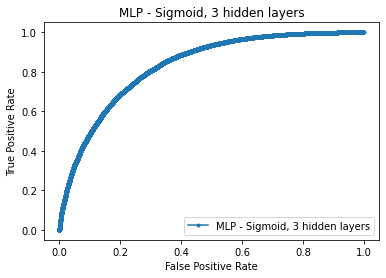

The accuracy for MLP is 86.592%
AUC = 0.83178


In [22]:
mlp_sigmoid_3 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid_3.fit(X_train, y_train)  
predictions = mlp_sigmoid_3.predict_proba(X_test) 
predictions = predictions[:, 1]
auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
plt.plot(fpr, tpr, marker='.', label='MLP - Sigmoid, 3 hidden layers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - Sigmoid, 3 hidden layers')
plt.legend()
plt.show()
accuracy = mlp_sigmoid_3.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))
print('AUC = %.5f' % (auc))

# Question 4

In [23]:
X_df_4 = df.drop("BMI", axis=1)
y_df_4 = df["BMI"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_4, y_df_4, test_size = 0.3, random_state = 0)

In [24]:
mlp_sigmoid = MLPRegressor(hidden_layer_sizes=(10), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid.fit(X_train, y_train) 
predictions = mlp_sigmoid.predict(X_test)
accuracy = metrics.mean_squared_error(y_test, predictions)
accuracy

0.8216374441134272

In [25]:
mlp_identity = MLPRegressor(hidden_layer_sizes=(10), activation='identity', max_iter=10000, random_state=0)  
mlp_identity.fit(X_train, y_train) 
predictions = mlp_identity.predict(X_test)
accuracy = metrics.mean_squared_error(y_test, predictions)
accuracy

0.8578617291599534

In [26]:
mlp_tanh = MLPRegressor(hidden_layer_sizes=(10), activation='tanh', max_iter=10000, random_state=0)  
mlp_tanh.fit(X_train, y_train) 
predictions = mlp_tanh.predict(X_test)
accuracy = metrics.mean_squared_error(y_test, predictions)
accuracy

0.8195920025755244

In [27]:
mlp_relu = MLPRegressor(hidden_layer_sizes=(10), activation='relu', max_iter=10000, random_state=0)  
mlp_relu.fit(X_train, y_train) 
predictions = mlp_relu.predict(X_test)
accuracy = metrics.mean_squared_error(y_test, predictions)
accuracy

0.8250421663974333

# Question 5

In [28]:
X_df_5 = df.drop("BMI", axis=1)
y_df_5 = df["BMI"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_5, y_df_5, test_size = 0.3, random_state = 0)

In [29]:
mlp_sigmoid_10 = MLPRegressor(hidden_layer_sizes=(10,10), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid_10.fit(X_train, y_train) 
predictions = mlp_sigmoid_10.predict(X_test) 
accuracy = metrics.mean_squared_error(y_test, predictions)
accuracy

0.8207124566433445

In [30]:
mlp_sigmoid_15 = MLPRegressor(hidden_layer_sizes=(15,15), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid_15.fit(X_train, y_train) 
predictions = mlp_sigmoid_15.predict(X_test) 
accuracy = metrics.mean_squared_error(y_test, predictions)
accuracy

0.8190709457000241

In [31]:
mlp_sigmoid_30 = MLPRegressor(hidden_layer_sizes=(30,30), activation='logistic', max_iter=10000, random_state=0)  
mlp_sigmoid_30.fit(X_train, y_train) 
predictions = mlp_sigmoid_30.predict(X_test) 
accuracy = metrics.mean_squared_error(y_test, predictions)
accuracy

0.817375398379225

# Extra Credit

In [32]:
X_df_ec = df.drop("Diabetes", axis=1)
y_df_ec = df["Diabetes"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_ec, y_df_ec, test_size = 0.3, random_state = 0)

In [33]:
mlp_baseline = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=0)  
mlp_baseline.fit(X_train, y_train)  
accuracy = mlp_baseline.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))

The accuracy for MLP is 86.596%


In [34]:
mlp_best = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=0)
estimator = Lasso(alpha=0.001, random_state=42)
selector = SelectFromModel(estimator)
selector.fit(X_df_ec, y_df_ec)
selected_features = X_df_ec.columns[selector.get_support()]
print(selected_features)
X_df_ec = selector.transform(X_df_ec)

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Myocardial',
       'PhysActivity', 'HeavyDrinker', 'GeneralHealth', 'MentalHealth',
       'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex', 'AgeBracket',
       'IncomeBracket'],
      dtype='object')


In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df_ec, y_df_ec, test_size = 0.3, random_state = 0)
mlp_best.fit(X_train, y_train)
accuracy = mlp_best.score(X_test, y_test)
print('The accuracy for MLP is {:0.3f}%'.format(100*accuracy))

The accuracy for MLP is 86.641%
